# Part I - (Ford Go Bike)
## by (Tae Singhanart)

## Introduction
I selected Ford GoBike System Data which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I retreived the dataset from [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load Dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

There are 183,412 entries with 16 features. The start_time and end_time is object type, there are needed to be change into time series type. The member_birth_year is float type it should be int. For the start_station_id and end_station_id , in this state, I'm not sure that are they really needed to be float type, I will investigate more.

### What is/are the main feature(s) of interest in your dataset?

My main features is user_type. I want to know the relationship of features such as age, gender and duration of the ride for each user types.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features of that would support my finding is the information about duration of the ride, end station, gender, and age.

In [4]:
#check duplicated data
df.duplicated().sum()

0

In [5]:
#check null value
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#drop the null value, as the station id and name are shouldn't be replace with other value. 
#The missing birth year and gender should be dropped as well as the missing portion doesn't huge.
df.dropna(axis = 0, inplace = True)

In [7]:
(df.start_station_id[0]).is_integer()

True

In [8]:
#Check if the start_station_id and end_station_id  is need to be float 
#for example there might be a substation such as 1.1 

for i in df.start_station_id:
        check = i.is_integer()
        assert check == True, "There are decimal value"
        
for i in df.end_station_id:
        check = i.is_integer()
        assert check == True, "There are decimal value"

In [9]:
# Not assert throw out, I will change the start_station_id and end_station_id into int

df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  int32  
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  int32  
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [10]:
#change birth year type as well
df['member_birth_year'] = df['member_birth_year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  int32  
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  int32  
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int32  
 14  memb

In [11]:
#Change the start_time and end_time into timeseries

df['start_time'] = df['start_time'].astype('datetime64')
df['end_time'] = df['end_time'].astype('datetime64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [12]:
#The duration_sec is in second, I think the minute format will be easier for communication

df['duration_min'] = df['duration_sec'] / 60

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333


In [13]:
#I will calculated the age column and drop the member_birth_year. 
#First Let's see what is the latest date in this data set
df.end_time.max()

Timestamp('2019-03-01 08:01:55.975000')

In [14]:
#As the latest year in the data set is 2019 and I will use the year to calculate the age of users

df['age'] = 2019 - df['member_birth_year']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [15]:
df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [16]:
#The column member_birth_year can be dropped now
df.drop(columns = 'member_birth_year', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [17]:
#From the df.head() above, I saw the 'other value in gender. 
#As there is no confirmation that what is exactly mean 'other' in gender in this dataset. 
#Does it means user don't provide the information or LGBT or something else?.
#Thus I will drop this entire which gender == 'other'
df = df[df['member_gender'] != 'Other']


In [18]:
df.member_gender.value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [19]:
#Export clean data to csv
df.to_csv("201902-fordgobike-tripdata-clean.csv", index=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### 1: user_type

In [20]:
#Define function for count plot with seaborn

def countplot(df,xVar,hue=None, color=0,palette=None, order=None, hue_order =None):
    '''
    This function generate value counts and plot with formatted title
    
    input: df, xVar (value to plot). These two are neccessary hue, color, palette, order and hue_order are optional
    output: value count and plot
    '''
    
    #print value count
    print(df[xVar].value_counts())
    
    #set plot dimensions
    plt.figure(figsize = [14,6])
    
    #plot
    sb.countplot(data = df, x = xVar, hue=hue, color= sb.color_palette()[color], palette=palette, order = order, edgecolor='black', linewidth=2,hue_order=hue_order);
    
    #optional: after plotting, clean up variable names
    xVar = xVar.replace("_"," ") # replace _ with space
    if hue:
        hue = hue.replace("_"," ")
    
    #add title and format it
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(), fontsize=14, weight = 'bold')
    
    #add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight ='bold')
    
    #add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight ='bold')
    

Subscriber    155189
Customer       16116
Name: user_type, dtype: int64


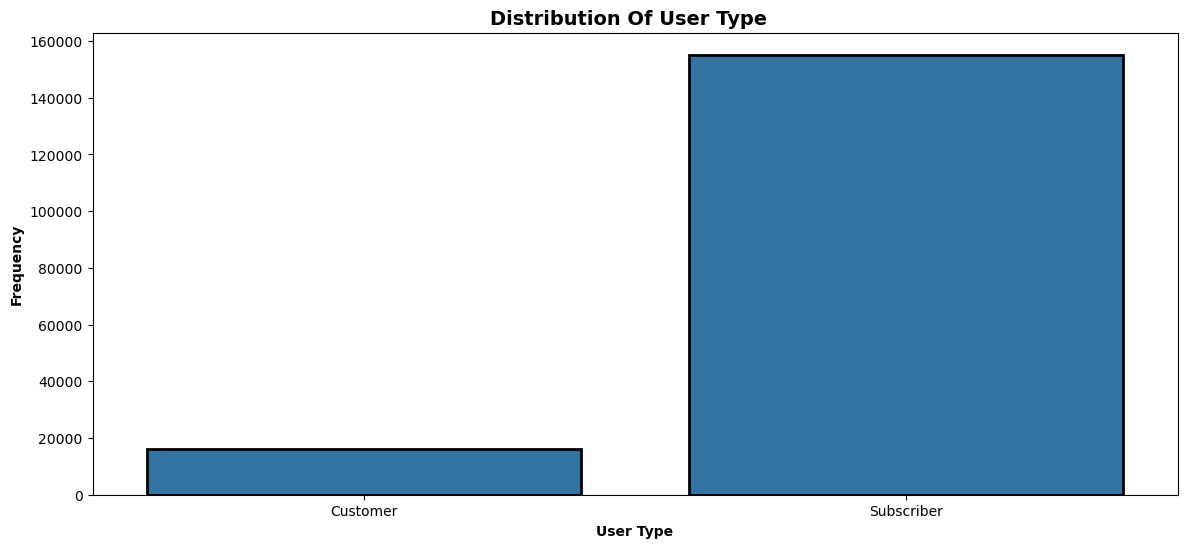

In [21]:
countplot(df,'user_type')

#### Obviously, the number of subscriber is more much than the customer type around 9.6 fold. 

### 2: gender

Male      130500
Female     40805
Name: member_gender, dtype: int64


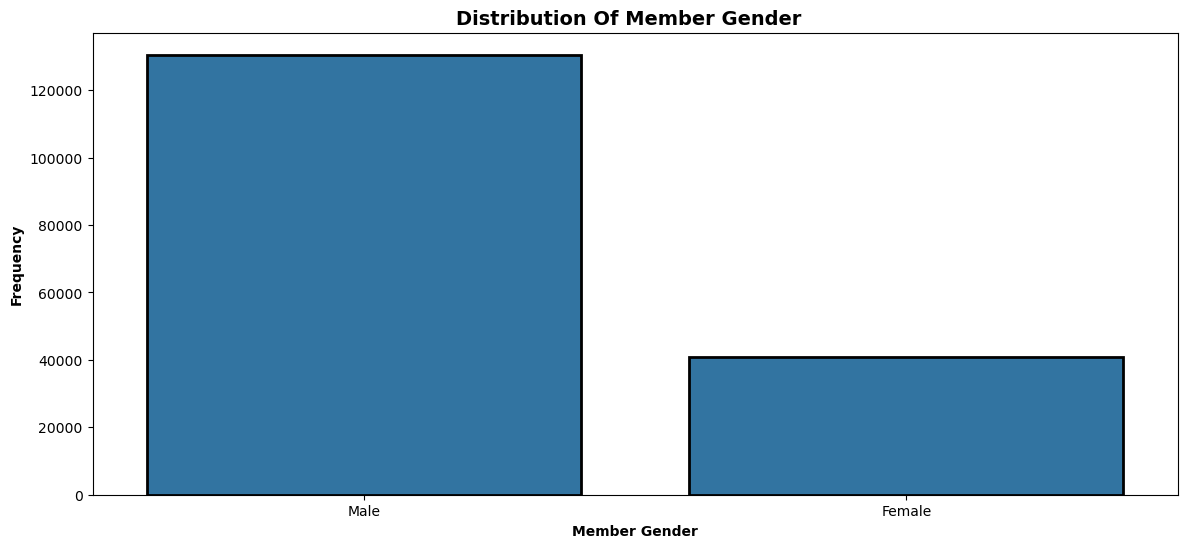

In [22]:
countplot(df,'member_gender')

#### From the plot above, male users are more than female 3 folds.

### 3: age

Text(0.5, 1.0, 'Distribution of Age')

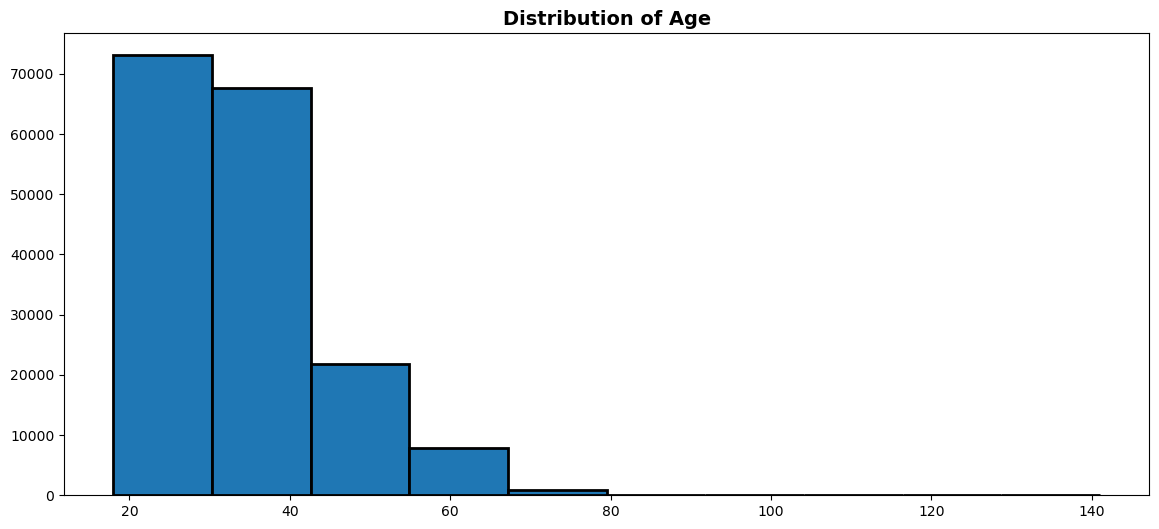

In [23]:
plt.figure(figsize=[14,6])
plt.hist(df.age, edgecolor='black', linewidth=2);
plt.title('Distribution of Age', fontsize=14, weight = 'bold')

In [24]:
#From the chart above,it look like there are outliers. Let's see the number first.
df.age.describe()

count    171305.000000
mean         34.160649
std          10.116083
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Box Plot of User Age')

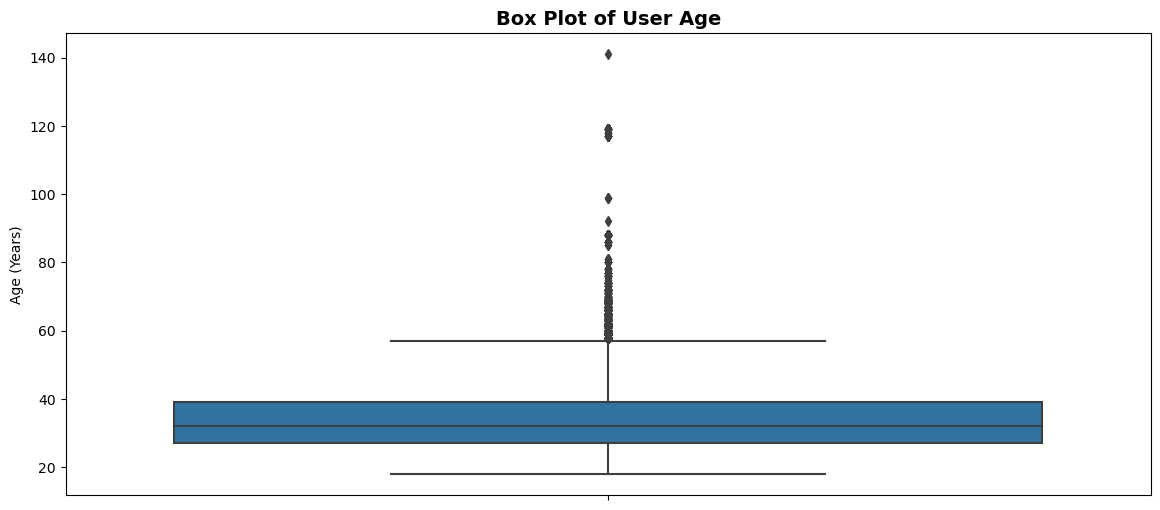

In [25]:
#The max age is 141 and the 75 percentile is 39. We needed to look closer with box plot
plt.figure(figsize=[14,6])
sb.boxplot(data = df, y = 'age').set(ylabel = 'Age (Years)')
plt.title('Box Plot of User Age', fontsize=14, weight = 'bold')

In [26]:
#From the plot above, after 80 seem to be outlier, Let's see how many of it
df[df['age'] > 80].count()

duration_sec               189
start_time                 189
end_time                   189
start_station_id           189
start_station_name         189
start_station_latitude     189
start_station_longitude    189
end_station_id             189
end_station_name           189
end_station_latitude       189
end_station_longitude      189
bike_id                    189
user_type                  189
member_gender              189
bike_share_for_all_trip    189
duration_min               189
age                        189
dtype: int64

In [27]:
#there only 189 entries of the > 80. I will use this mark as a outlier exclusion
df =  df[df['age'] < 80 ]

In [28]:
df.age.describe()

count    171105.000000
mean         34.085579
std           9.866425
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          78.000000
Name: age, dtype: float64

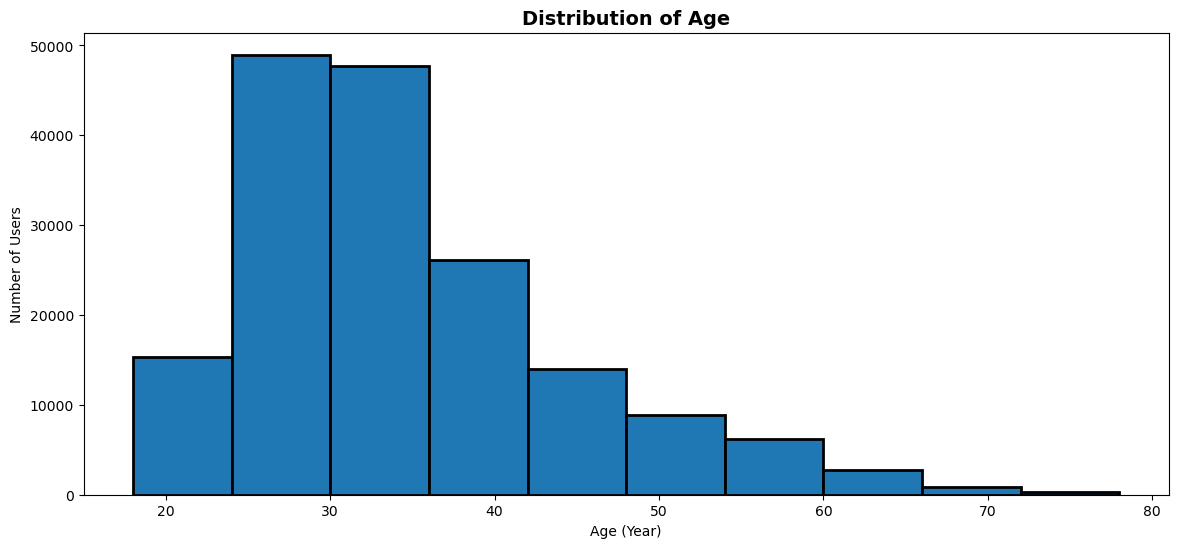

In [29]:
#plot age again
plt.figure(figsize=[14,6])
plt.hist(df.age, edgecolor='black', linewidth=2,);
plt.title("Distribution of Age", fontsize=14, weight = 'bold')
plt.xlabel('Age (Year)')
plt.ylabel('Number of Users')
plt.show()

#### The distribution of age seem to skew to the right,  the majority of the users seem to fall into the range of  25-35 year old

### 4: duration_min 

In [30]:
#Find the max duration that user use Go Bike for a ride (mins)
df.duration_min.max()

1409.1333333333334

Text(0.5, 1.0, 'Distribution of Ride Trip Duration')

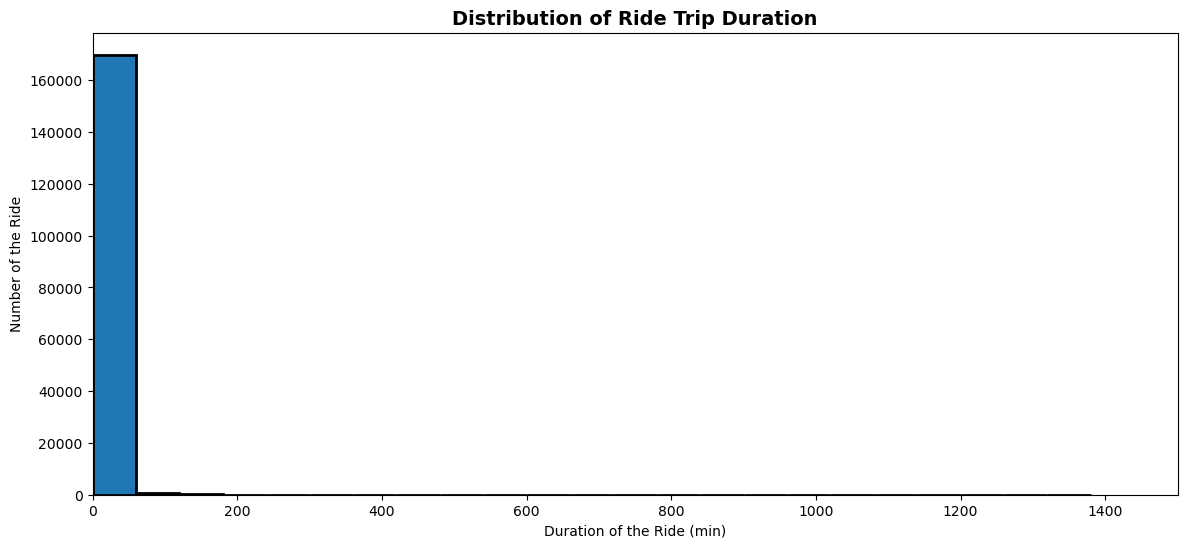

In [31]:
#the max number is pretty huge. Let's plot the bar chart to see the distribution

bins = np.arange(0, df.duration_min.max()+5, 60)
plt.figure(figsize=(14,6))
plt.hist(data=df, x='duration_min', bins=bins, edgecolor='black', linewidth=2,);
plt.xlim((0,1500))
plt.ylabel('Number of the Ride')
plt.xlabel('Duration of the Ride (min)')
plt.title('Distribution of Ride Trip Duration',fontsize=14, weight = 'bold')

Text(0.5, 1.0, 'Distribution of Ride Duration (log)')

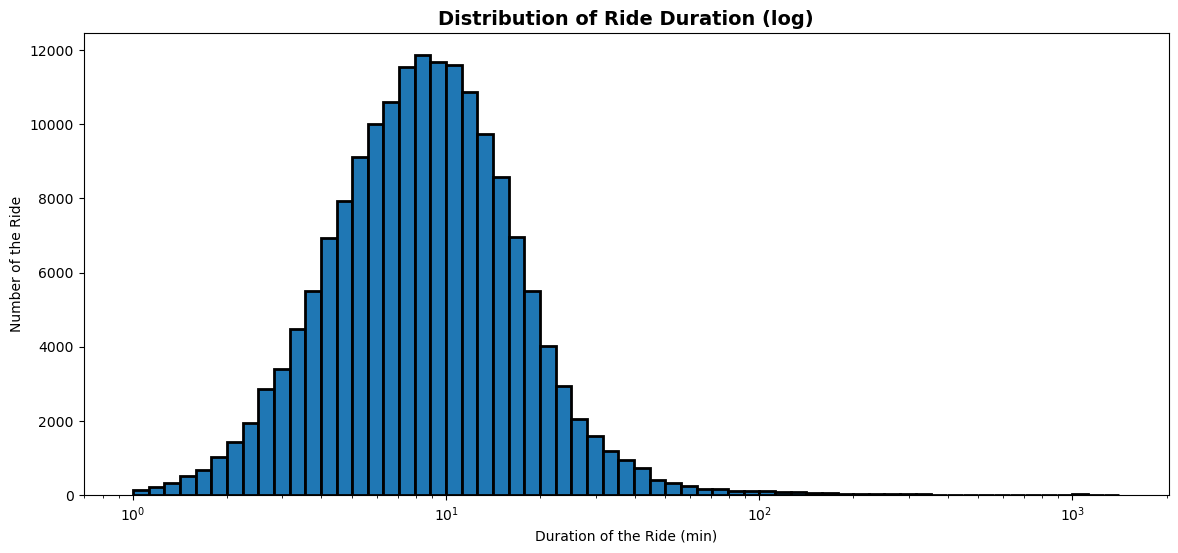

In [32]:
#The plot seem to be long tail,Let's try the log scale to plot it again
log_binsize = 0.05
log_bins = 10**np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize= [14,6]);
plt.hist(df['duration_min'], bins = log_bins, edgecolor='black', linewidth=2,);
plt.xscale('log')
plt.ylabel('Number of the Ride')
plt.xlabel('Duration of the Ride (min)')
plt.title('Distribution of Ride Duration (log)',fontsize=14, weight = 'bold')

#### From the plot above, it's very nice to see no skew and it's also indicate that most of the trip is last about 8-10 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are no unusual about the user type feature. For gender, there are some unclear value 'other' thus I dropped those entries as well. Lastly for the duration, the regular scale plot is very hard to see the data thus I applied the log transformation to make the plot easier to see.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>For the age features, after the first plot I saw the outlier and confirmed by df.age.describe(). After that I plot a boxplot and clear the outlier after 80 year old. The reason to doing this is to keep the data more realiable and less distort the distribution.

### 5: Top destination (from end_station_name)

In [33]:
top_five_des = df.end_station_name.value_counts().head()
print(top_five_des)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4581
Market St at 10th St                                         3629
Montgomery St BART Station (Market St at 2nd St)             3374
San Francisco Ferry Building (Harry Bridges Plaza)           3084
San Francisco Caltrain (Townsend St at 4th St)               2823
Name: end_station_name, dtype: int64


Text(0, 0.5, 'Station Name')

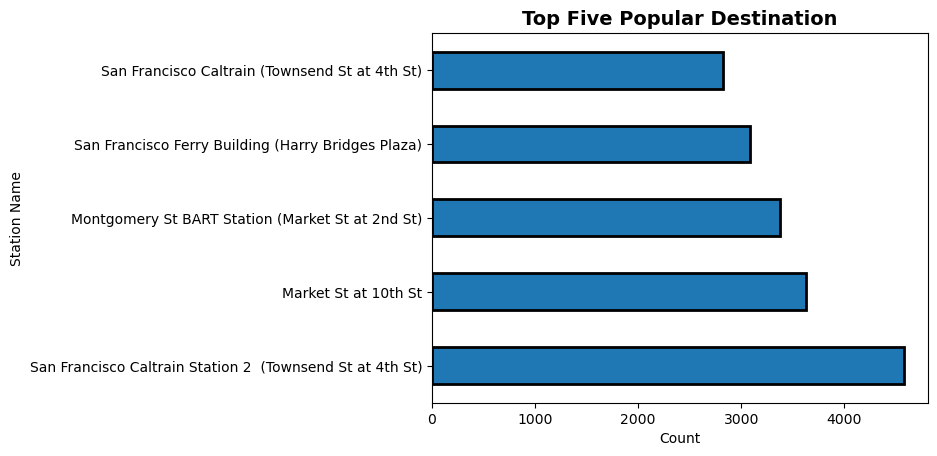

In [34]:
top_five_des.plot(kind ='barh', edgecolor='black', linewidth=2,)
plt.title('Top Five Popular Destination', fontsize=14, weight = 'bold')
plt.xlabel('Count')
plt.ylabel('Station Name')

#### From the plot above the most popular destination is San Francisco Caltrain Station 2  (Townsend St at 4th St)  with 4581 rides.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 6: user_type and age

Text(0.5, 1.0, 'Age of each User Type')

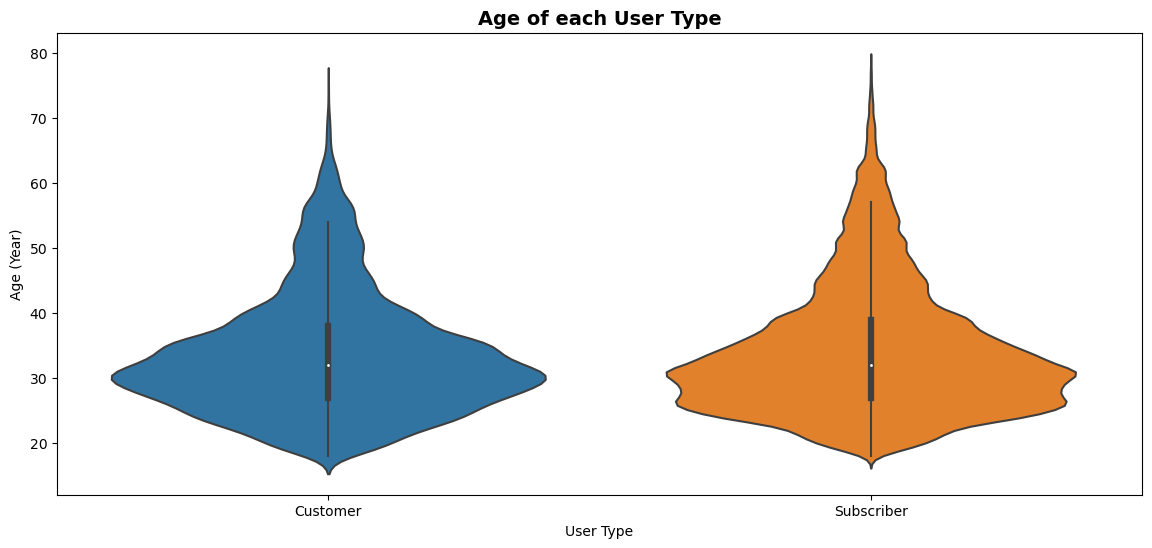

In [35]:
plt.figure(figsize =[14,6])
sb.violinplot(x= df['user_type'], y = df['age'])
plt.ylabel('Age (Year)')
plt.xlabel('User Type')
plt.title('Age of each User Type',fontsize=14, weight = 'bold')

#### It is very interesting to see that the age profile of customer and subscriber group is quite simliar. The spread of the IQR of ubscriber seems to a bit more than customer group

### 7: user_type and gender

Subscriber    155000
Customer       16105
Name: user_type, dtype: int64


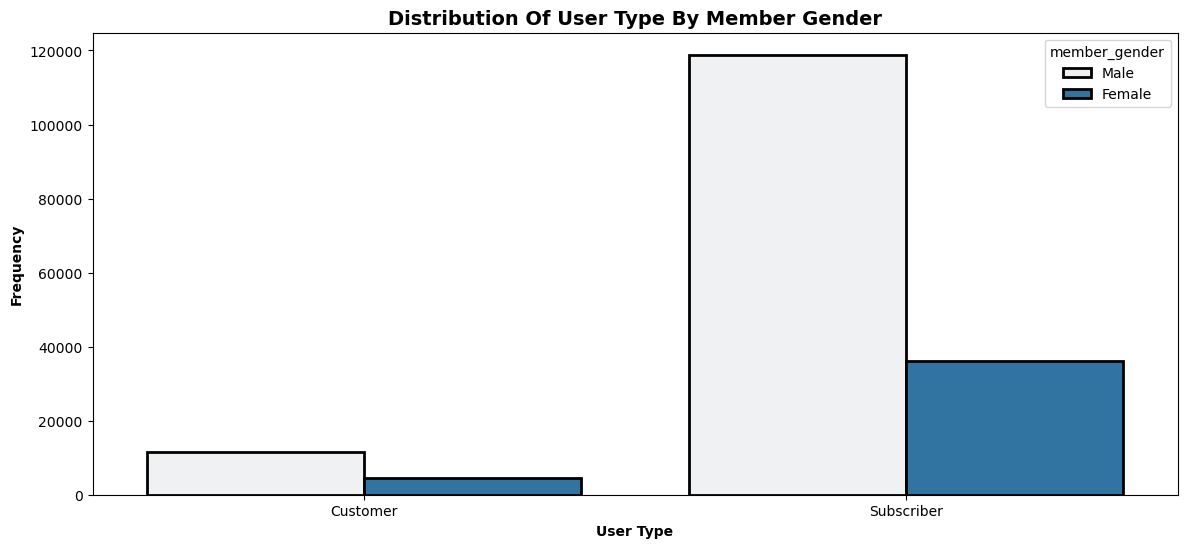

In [36]:
countplot(df,'user_type', hue='member_gender')

#### From the bar plot above, there are more male member in both group. Noticably, the number of male subscriber is far way more than the other group around 3-25 folds.

### 8: user_type and duration_min

Text(0.5, 1.0, 'Ride Duration based on User Type')

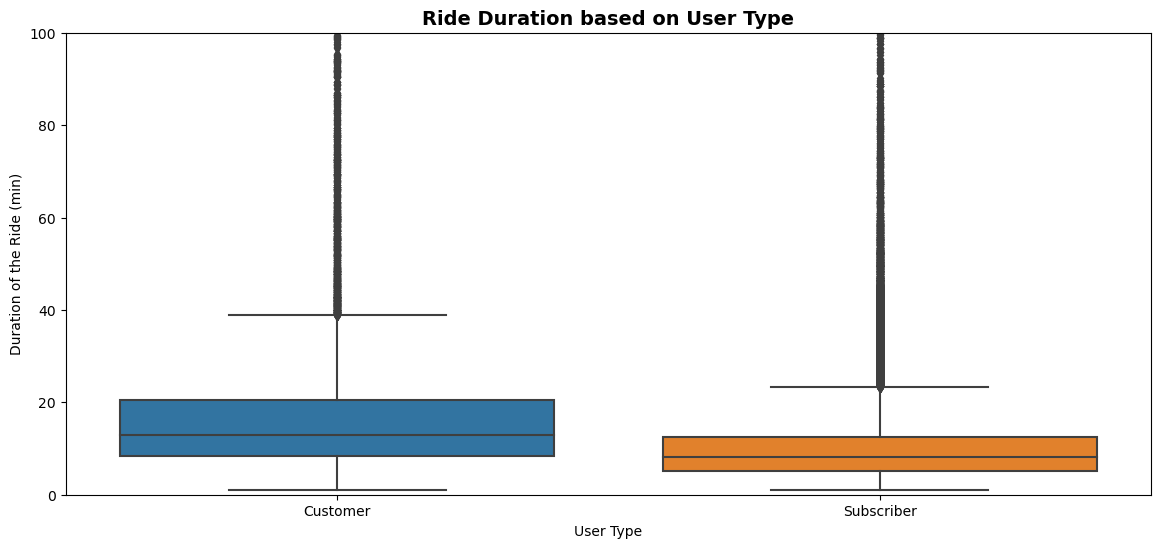

In [37]:
plt.figure(figsize =[14,6])
sb.boxplot(x= df['user_type'], y = df['duration_min'])
plt.ylim([0,100])
plt.ylabel('Duration of the Ride (min)')
plt.xlabel('User Type')
plt.title('Ride Duration based on User Type',fontsize=14, weight = 'bold')

#### From the plot above, the customer group seem to have longer duration ride than subscriber. Interestingly to see the 75% percentile of subscriber group is nearly in the same level of the median duration of the customer group.

### 9: age and duration_min


Text(0, 0.5, 'Ride duration (min)')

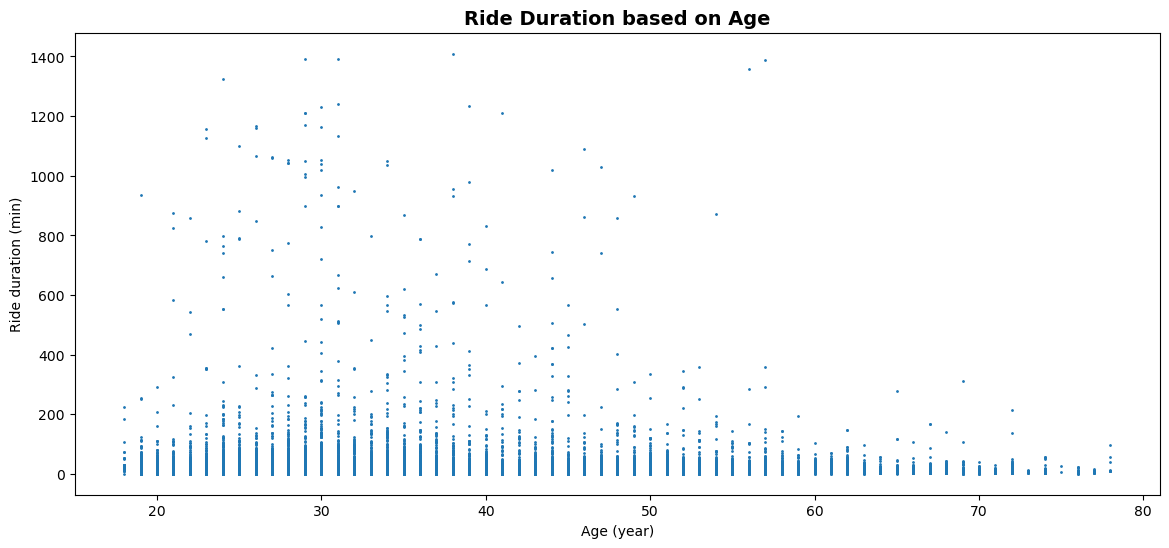

In [38]:
plt.figure(figsize = [14,6])
plt.scatter(x = df['age'], y= df['duration_min'], s= 1);
plt.title('Ride Duration based on Age',fontsize=14, weight = 'bold')
plt.xlabel('Age (year)')
plt.ylabel('Ride duration (min)')

#### From the plot above the age group of 20-40 seems to have more ride duration around 300-1000 minutes more than 40+ year old. However, area of 1 to 200 minutes is heavily clutter. I will use the heat map to solve the problem of this enormous data point overlapping in plot.

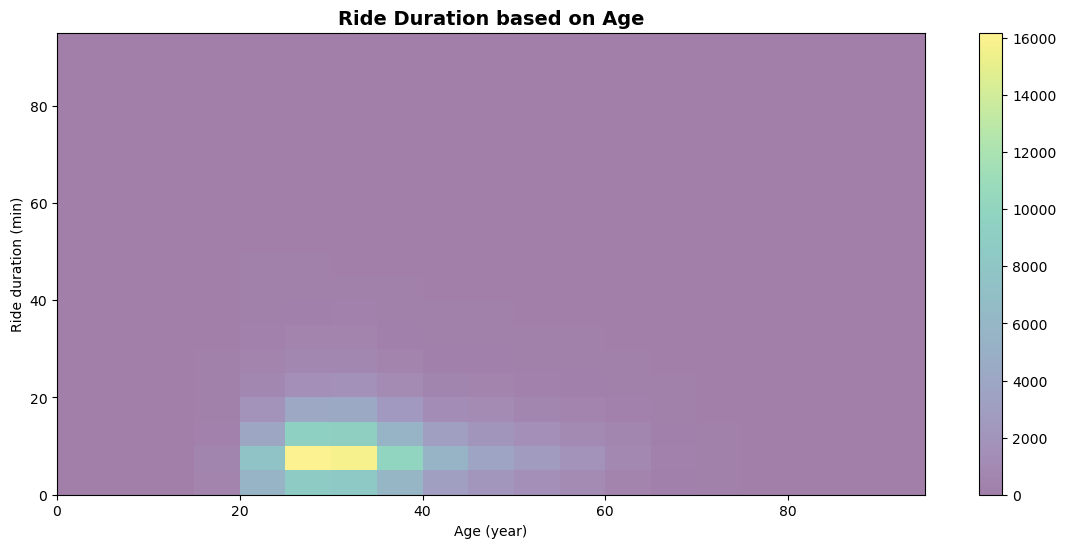

In [39]:
plt.figure(figsize =[14,6])
xbin = np.arange(0, 100, 5);
ybin = np.arange(0, 100, 5 );
plt.hist2d(df['age'], df['duration_min'],  bins = (xbin, ybin), alpha = 0.5);
plt.title('Ride Duration based on Age',fontsize=14, weight = 'bold')
plt.xlabel('Age (year)')
plt.ylabel('Ride duration (min)')
plt.colorbar();

#### The yellow area of the heat map show that the most popular ride is around 5-15 minutes by the age group around 25-35

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It's very interesting to see that the age profile for both user groups look similiar.But the duration of the ride are different between user type as the customer group seems to have a longer ride than subscriber 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found the most popular ride from the relationship between duration_min and age which show that the most popular ride is around 5-15 minutes by the age group around 25-35

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Both Subscriber and customer group, male gender take a more ride

### 9: Ride duration by user type and age

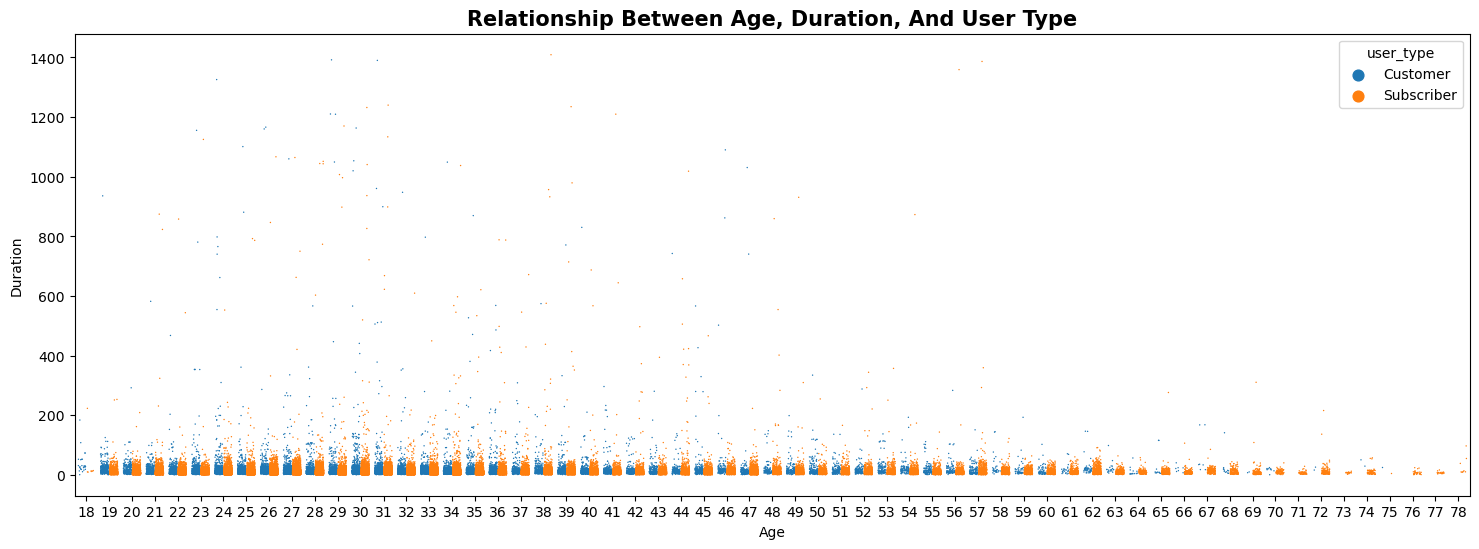

In [40]:
plt.figure(figsize=[18,6])

sb.stripplot(data = df, x= 'age', y='duration_min', hue='user_type', size = 1 , hue_order = None, order = None, jitter =0.35, dodge= True);
plt.title('Relationship between age, duration, and user type'. title(), fontsize = 15, fontweight = 'bold')
plt.xlabel('age'.title())
plt.ylabel(('Duration'.title()))
plt.show();

#### There are some outlier that cause a lot of white space in the plot. Let's plot another one without outlier

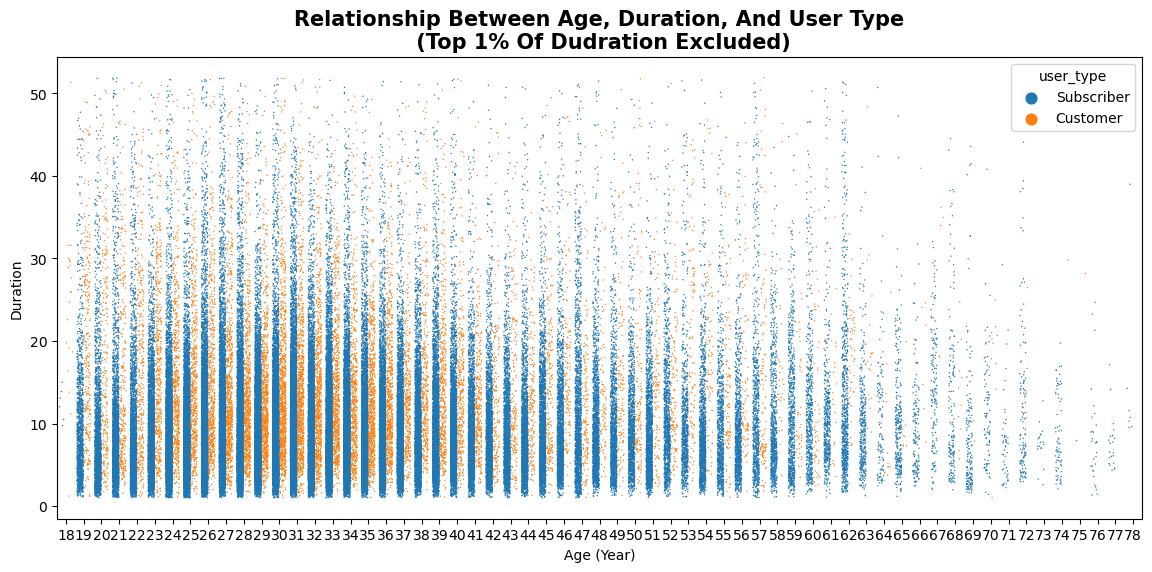

In [41]:
one_percent_exclude = df.query("duration_min < duration_min.quantile(0.99)")

plt.figure(figsize=[14,6])
sb.stripplot(data = one_percent_exclude, x = 'age', y='duration_min', hue='user_type', size = 1 , hue_order = None, order = None, jitter =0.35, dodge= True)
plt.title('Relationship between age, duration, and user type\n (Top 1% of dudration excluded)'. title(), fontsize = 15, fontweight = 'bold')
plt.xlabel('age (year)'.title())
plt.ylabel(('Duration'.title()))
plt.show();

#### From the stripplot plot above, most ride are take around 1 - 40 minutes. It's also show that the member after 60 year olds who taking the trip from 1-40 minutes are mostly customer than subscriber. 

### 10: Number of ride of the top three destination ride by user type and age

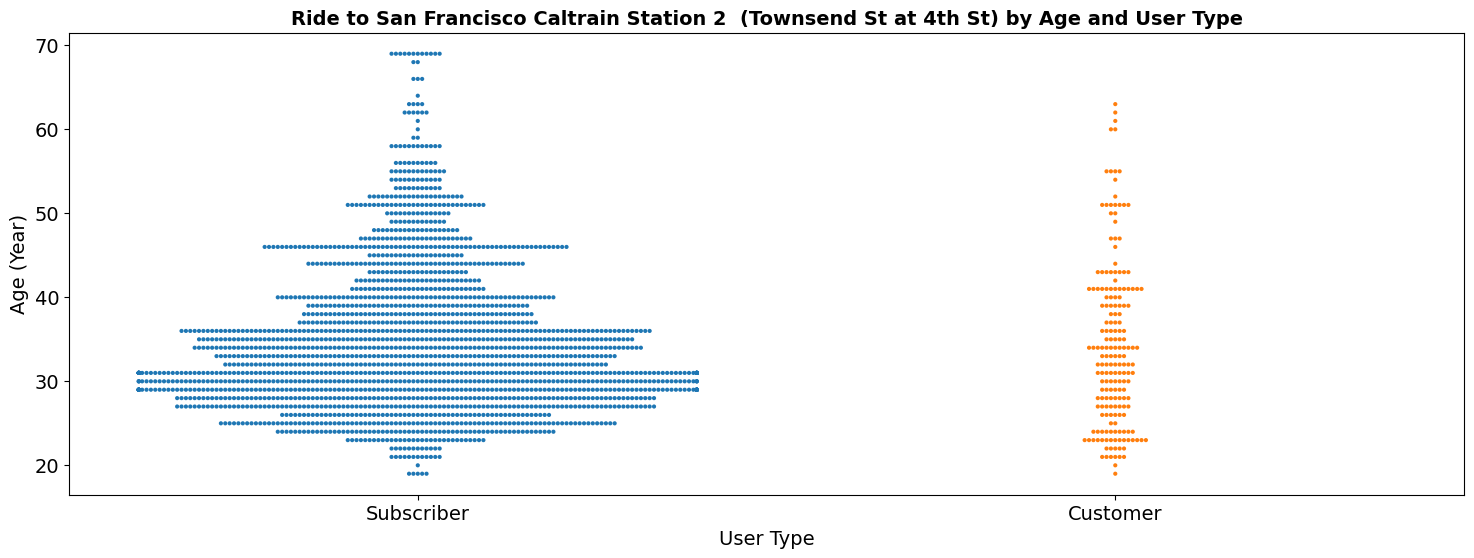

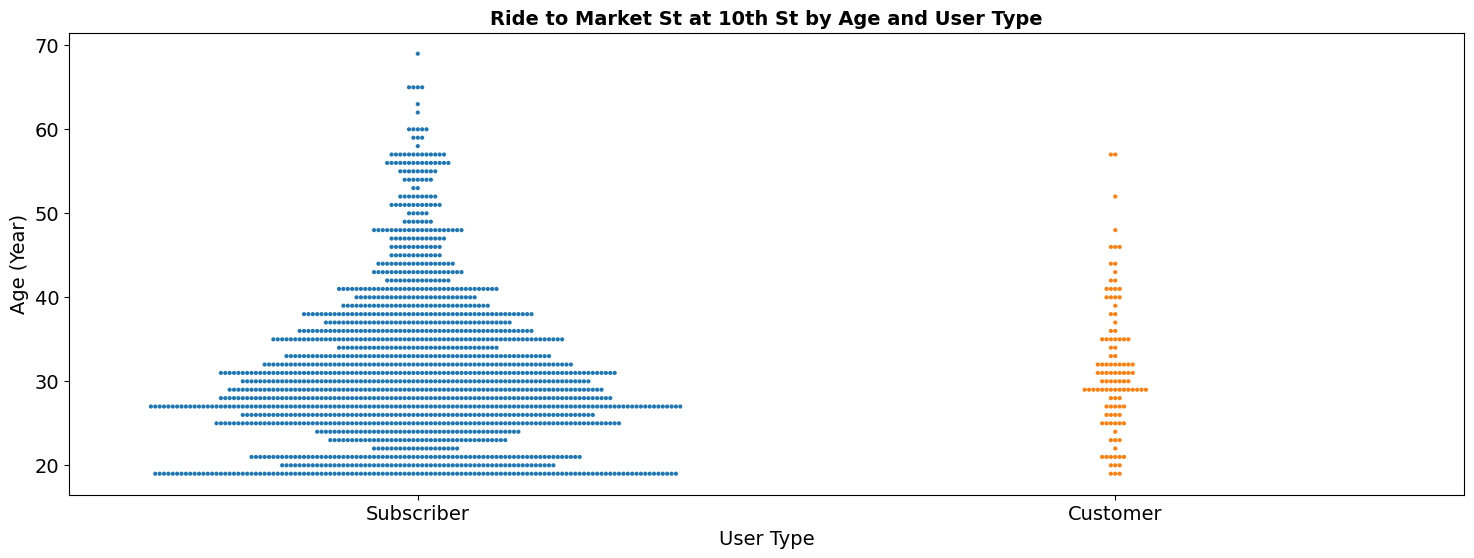

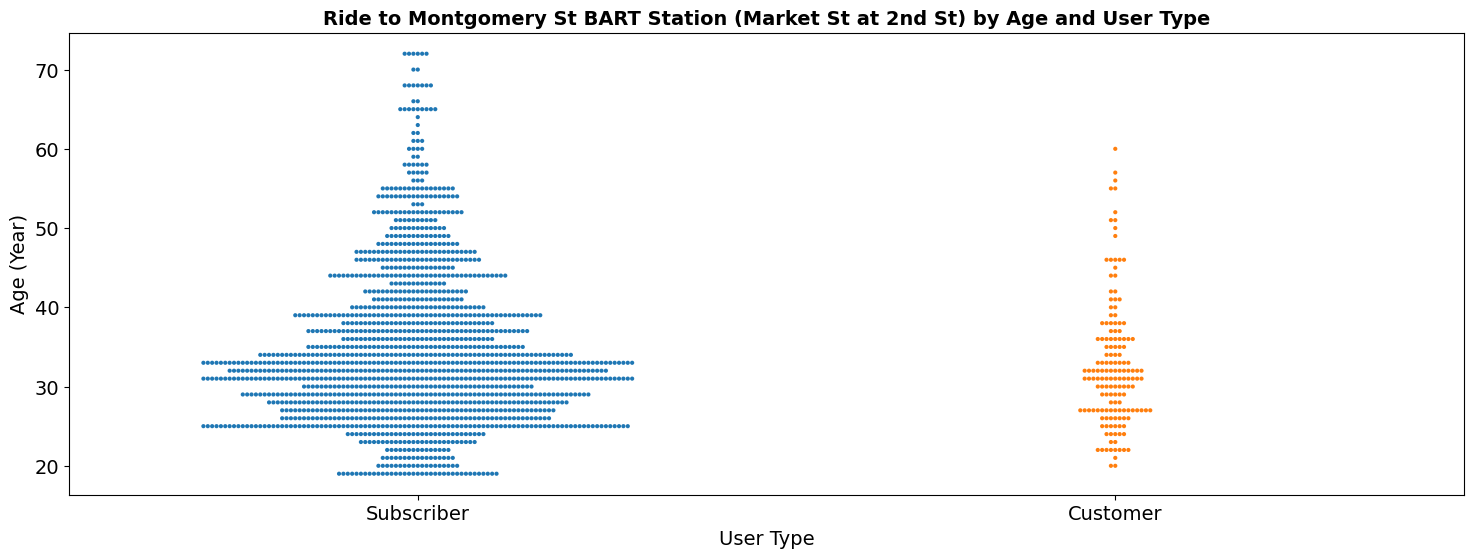

In [42]:
for i in range (3):
    #subsetting df
    df_top =  df[df['end_station_name'] == top_five_des.index[i]]
    #to reduce computational, I will sample out of the dataset by half
    df_top_sample = df_top.sample(int((df_top.shape[0])*0.5), random_state=42)
    #plot swarmplot
    plt.figure(figsize =[18, 6])
    sb.swarmplot(x= df_top_sample['user_type'], y = df_top_sample['age'], size = 3)
    plt.ylabel('Age (Year)', size = 14)
    plt.xlabel('User Type', size = 14)
    plt.yticks(size = 14)
    plt.xticks(size = 14)
    plt.title('Ride to ' + str(top_five_des.index[i]) + ' by Age and User Type', fontsize=14, weight = 'bold');

#### From the swarm plot above,  showing that in each top three place, the majority group of visitor is different between subscriber and customer. For example, Market St at 10 St, the subscriber with the below 20 and mids 20 are the most group riding to this place while the customer group is the age over 30. 

#### In marketing perspective, this information help the company gain a huge advantage when it come to lauching the promotion on site or select target group for some specific promotion.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This part I try to find the relationship among variable based on the user type. And I found that the gender also indicate the number of ride regardless of the member type. For the age, the plot showed member after 60 year olds who taking the trip from 1-40 minutes are mostly customer than subscriber.

### Were there any interesting or surprising interactions between features?
From the swarm plot above, showing that each top three places have a different user type also different in the majority group to take the ride. For example, on the Market St at 10 St, the subscriber below 20 and mids 20 are the groups riding to this place the most while the customer group is the age over 30. In a marketing perspective, this information helps the company gain a huge advantage when it comes to launch the promotion on-site or selecting a target group for some specific promotion. 



## Conclusions

In summary, initially, there were 183,412 entries with 16 features in this dataset. I wrangled it by checking the remove null value, changing the datatypes, changing the time format of the second to minute, dropping the 'other' value in gender, and recalculating the age from the member's birth year. Also, I  removed the age outlier. In the visualization process, I transform the plotting of the distribution of ride duration to the logarithmic scale for clearer visualization.Additionally, plotting the ride duration by user type and age found the outlier that show a lot of white space thus I remove 1% outlier and plot again.

The main feature I'm interested in this data set is user type, customer and subscriber. I want to see some different or commonality (if any) relationship with other features such as the duration of the ride, gender, and age. 

The finding is showing that t the age profile of customer and subscriber group is quite simliar. For the gender by user type, there are more male member in both group. Noticably, the number of male subscriber is far way more than the other group around 3-25 folds. The customer group seem to have longer duration ride than subscriber. In Gender wise, both subscriber and customer group, male gender take a more ride. For both group most ride are take around 1 - 40 minutes. It's also show that the member after 60 year olds who taking the trip from 1-40 minutes are mostly customer than the subscriber. Lastly,  the exploration also showing that in each top three place, the majority group of visitor is different between subscriber and customer. For example, Market St at 10 St, the subscriber with the below 20 and mids 20 are the most group riding to this place while the customer group is the age over 30. In marketing perspective, this information help the company gain a huge advantage when it come to lauching the promotion on site or select target group for some specific promotion.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

